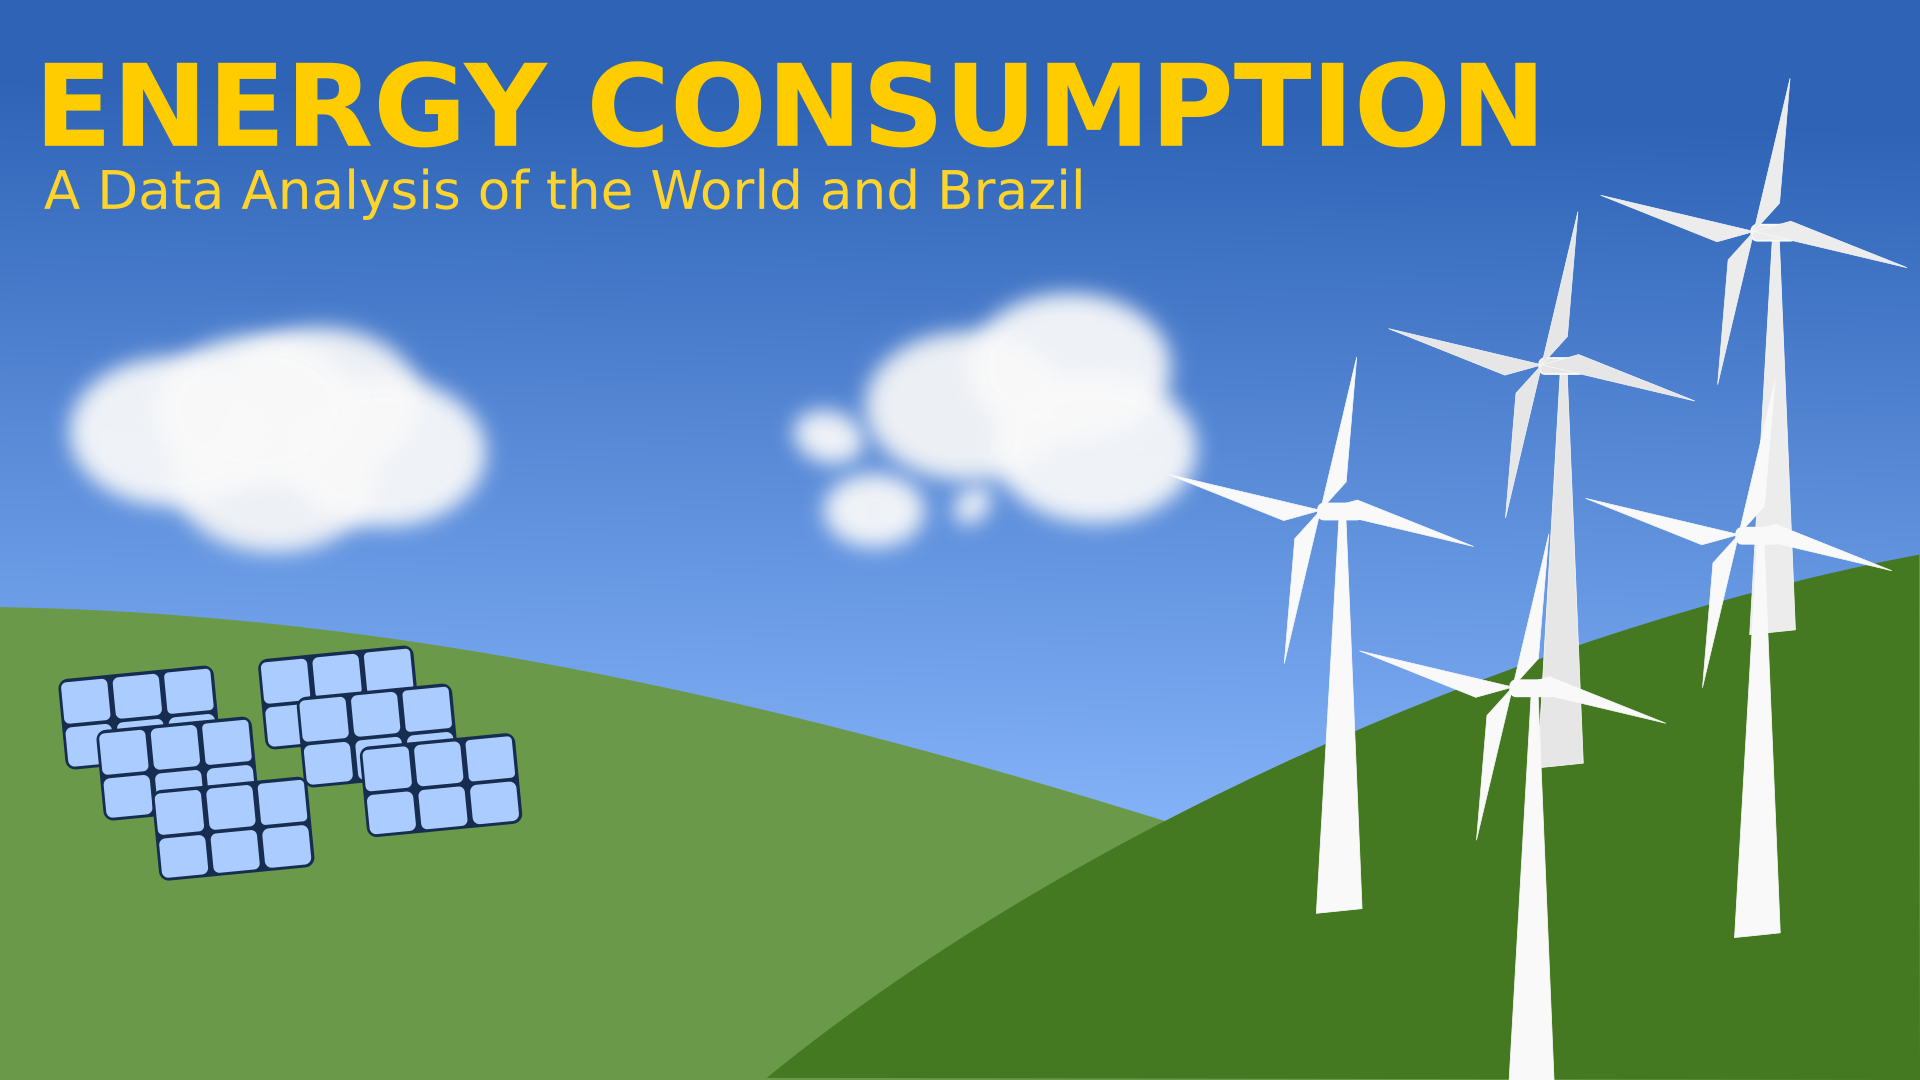

# Energy consumption and Sustainability
## A Data Analysis for the Google Data Analytics Specialization

This analysis is part of the [Google Data Analytics Specialization Course](https://www.coursera.org/professional-certificates/google-data-analytics) on Coursera. The last part asks us to do a data analysis of either a business problem (proposed by google) or something of our own interest. So I've chosen to create an analysis of my interest, about energy and sustainability. (If you want, you can see my certification using [this link](https://coursera.org/share/fb6d19defbb07168641171ac9b1f8d8d))

This analysis uses **free and open data**, available at [Our World in Data](https://ourworldindata.org/), specifically the [Energy Data](https://github.com/owid/energy-data).[1]


**Notes:**
 - [1] All Metrics and Data sources can be found on those repos, I will just assume that the data is correct for this analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as collections

energy_df = pd.read_csv('owid-energy-data.csv')

In [3]:
energy_df.head()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Following the course's guidelines, for a through data analysis, we must:

1. **Ask**
2. **Prepare**
3. **Process**
4. **Analyze**
5. **Share**
6. **Act**

So I'll start with the **questions** that I hope will be answered by this data:

- **Who are the best and the worst countries in terms of using sustainable energy**
- **Looking at those who are doing well, what can we learn to implement in other countries and achieve our world goals quicker?**
- **How is Brazil (my home country) doing in that regard?**


As mentioned before, I'll assume the data is correct and clean, so the first thing I need to do is pick and choose the metrics that will be the most usefull for answering my specific questions. I've noted that the Energy Dataset has a metric called **low_carbon_share_energy**, which corresponds to:

*Share of primary energy consumption that comes from low-carbon sources. This is the sum of primary energy from renewables and nuclear*

Perfect! That's exactly what I need in order to determine wether the use of clean energy [2] is decreasing or increasing for each country, during the time scale of the dataset.

**Notes:**
 - [2] I'm usign "clean" in a very narrow sense: which is low carbon. For the purposes of this study I won't get into a broader definition of what clean actually mean.

In [4]:
energy_wanted_df = energy_df[['year','country','low_carbon_share_energy']]  # Data Frame of only the information 
                                                                            # we'll use during our analysis.

Looking through the data, I've noticed three problems for our analysis: 

1. There are rows for 2021, but no data. So we must clean it!
2. There are also many null values in this data set, we must decide what to do with it.
3. Our analysis is concerned about individual countries, but the data set has rows for continents (as well as the world as a whole), so we must also drop those.

But, before actually getting rid of those values, we might as well use them, for example, we might ask: **how have the energy sources changed in the world, as a whole?**

In [5]:
world_df  = energy_df[energy_df['country'] == 'World'][['year','biofuel_share_energy','coal_share_energy',
                                          'gas_share_energy','hydro_share_energy', 'nuclear_share_energy',
                                           'oil_share_energy', 'other_renewables_share_energy', 'solar_share_energy',
                                           'wind_share_energy'
                                          ]]

In [6]:
world_df = world_df.dropna()

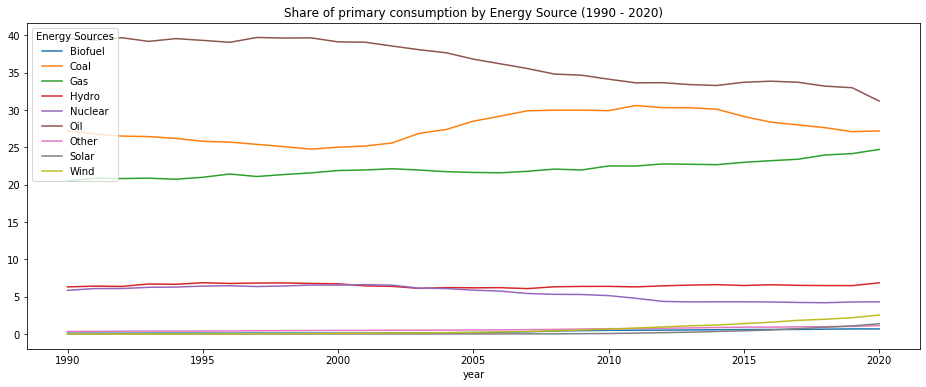

In [7]:
y = world_df.keys()[1:]
world_df.plot(x = 'year', y = y, title = 'Share of primary consumption by Energy Source (1990 - 2020)', 
              figsize = (16,6))

plt.legend(['Biofuel', 'Coal', 'Gas', 'Hydro', 'Nuclear', 'Oil', 'Other', 'Solar', 'Wind'],
           loc='upper left', title='Energy Sources')

### This graph shows us quite a few interesting trends!

We can see, for example, a **drop in coal and oil in recent years** and a somewhat timid **increase in renewables**. We can aggregate renewables and non-renewables together, to see those trends more clearly. But, before, there are also some interesting things to note individually:

We can see a **drop in nuclear's share**, starting in the early 2000s. This ties heavilly with a old and growing distrust in nuclear technology from the public [3], especially after some notorious nuclear accidents, like in Chernobyl (1986) and in Fukushima (2011). 

We also note that **gas has been steadily rising**, probably in order to make up for the decrease in use of coal and oil for heating in cold contries. But the interesting thing is: Russia is the [second biggest producer of gas in the world](https://www.worldometers.info/gas/gas-production-by-country/) and also its [most important exporter](https://en.wikipedia.org/wiki/List_of_countries_by_natural_gas_exports). **How will the War Against Ukraine and, thus, the inumerous sanctions made against russian gas, impact this graph after 2022?** [4]

Of course, from now we can only speculate, but, judging by [initial statements](https://www.bbc.com/news/science-environment-60664799), there should be a drop in gas's share, as reliant countries find alternatives (Hopefully, green ones: ["The EU also proposes a massive ramping up of renewables, biogas and hydrogen. While carbon emissions may rise in the short term, the longer-term aim is a speedier transition to sustainable sources."](https://www.bbc.com/news/science-environment-60664799)). But that's easier said than done, since the importance and the logistic dificulties impose great obstacles for the sudden halt in exporting. [5]


**Notes:**
 - [3] Hohenemser, Christoph, Roger Kasperson, and Robert Kates. ["The Distrust of Nuclear Power: Nuclear power is assessed hypercritically because of its unique history, complexity, and safety management."](https://www.science.org/doi/abs/10.1126/science.841337) Science 196.4285 (1977): 25-34.
 - [4] [EU Warns Putin’s Rubles-for-Gas Demand Would Break Sanctions.](https://www.bloomberg.com/news/articles/2022-04-13/eu-warns-putin-s-rubles-for-gas-demand-would-breach-sanctions) - Bloomberg (Access in: 04/05/2022)
 - [5] [How reliant is the world on Russia for oil and gas?](https://www.bbc.com/news/58888451) - BBC (Access in: 04/05/2022)

In [8]:
# Aggregating values

world_df['Fossil'] = world_df['coal_share_energy'] + world_df['gas_share_energy'] + world_df['oil_share_energy'] 
world_df['Renewable'] = world_df['biofuel_share_energy'] + world_df['hydro_share_energy'] + world_df['other_renewables_share_energy'] + world_df['solar_share_energy'] + world_df['wind_share_energy']
world_df['Green'] = world_df['Renewable'] + world_df['nuclear_share_energy']

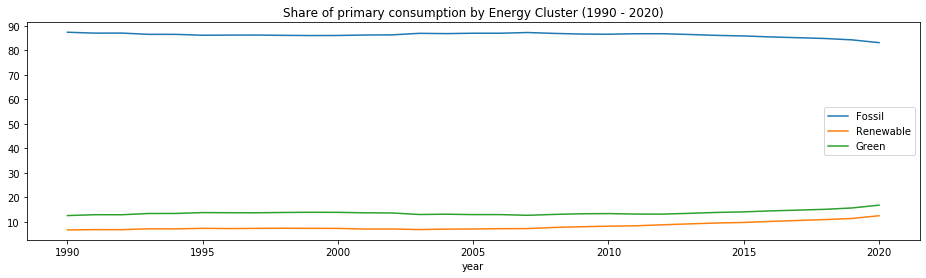

In [9]:
world_df.plot(x = 'year', y = ['Fossil','Renewable','Green'], title = 'Share of primary consumption by Energy Cluster (1990 - 2020)', 
              figsize = (16,4))

Yep, It's definitly there: **A timid drop in Fossil reliance with an timid increase in Green's share.**

## I was alredy getting off-track! 

Let's go back to looking for those countries that have been doing well in using greener types of energy: Let's start by cleaning those null values.

### What strategy will we use?

Well, it's obvious that we can't assume that not having an value is equal to not using green energy, because that would skew our analysis. We could assume the same value as for the continent, but that would be the same as making the data irrelevant, it would be the same as not having it there. 

Well, in that case, why not just do that? I'll just drop any null values!

In [10]:
energy_wanted_df = energy_wanted_df.dropna()

### Now, for removing those macro-regions and continents!

Those are all of them in our data:

In [11]:
macro_regions = ['Africa', 'Asia Pacific','CIS','Eastern Africa', 'Europe', 'European Union (27)','Middle Africa'
'Middle East','Non-OECD','OECD','USSR','Western Africa', 'World']

And since we only want the most recent information we can get, lets change set the year to 2020

In [12]:
energy_wanted_df = energy_wanted_df[energy_wanted_df['year'] == 2020]

In [13]:
idx_list = []

for idx, country in enumerate(energy_wanted_df['country']):
    if country in macro_regions:
        idx_list.append(energy_wanted_df.index[idx])


energy_wanted_df = energy_wanted_df.drop(idx_list)

#energy_wanted_df.drop(energy_wanted_df[energy_wanted_df['country'].isin(macro_regions)].index())

Right, so now we only have countries in 2020, we can sort those values by the 'low_carbon_share_energy' column and then display the head and the tail.

In [20]:
energy_best_ten = energy_wanted_df.sort_values(by = 'low_carbon_share_energy', ascending = False).head(10).reset_index()
energy_worst_ten = energy_wanted_df.sort_values(by = 'low_carbon_share_energy', ascending = False).tail(10).reset_index()

### Here are the ten best in primary low-carbon energy consumption:

In [22]:
energy_best_ten[['country', 'low_carbon_share_energy']]

,country,low_carbon_share_energy
0,Iceland,82.740
1,Sweden,70.084
2,Norway,69.615
3,Switzerland,53.902
4,France,50.191
5,Finland,49.194
6,Brazil,47.185
7,Slovenia,39.087
8,New Zealand,37.312
9,Austria,36.392


### And here are the ten worst:

In [23]:
energy_worst_ten[['country', 'low_carbon_share_energy']]

,country,low_carbon_share_energy
0,Bangladesh,0.626
1,Algeria,0.254
2,Singapore,0.253
3,Oman,0.134
4,Hong Kong,0.117
5,Kuwait,0.101
6,Saudi Arabia,0.087
7,Qatar,0.064
8,Trinidad and Tobago,0.007
9,Turkmenistan,0.006


Okay, so that's interesting: Just by looking at the top ten and bottom ten, it looks like there may be a **strong correlation between usage of low-carbon energy sources and GDP**. We should test that hypothesis!

The first thing to do is to get the relevant information:

In [16]:
correlation_hypothesis_df = energy_df[['year','country','low_carbon_share_energy','gdp']]

As always, we first must choose what to do with the null values. For the same reason as before, I believe the best thing to do is just ignore them.

We shall also get rid of those macro regions and set the year to 2018 [6].

**Notes:**
 - [6] Unfortunally, GDP data only goes up to 2018, so we can't validate for the results in 2020. But it's quite unlikely that those relations change so drastically in only a couple of years. 

In [17]:
idx_list = []

for idx, country in enumerate(correlation_hypothesis_df['country']):
    if country in macro_regions:
        idx_list.append(correlation_hypothesis_df.index[idx])


correlation_hypothesis_df = correlation_hypothesis_df.drop(idx_list)
correlation_hypothesis_df = correlation_hypothesis_df[correlation_hypothesis_df['year'] == 2018]

correlation_hypothesis_df = correlation_hypothesis_df.dropna()

But there's an aditional step we're going to take: let's **normalize those values**! 

While there are many ways to normalize something, here we'll just divide each value to the best value of that column, ensuring that they all are between 0 and 1. In this case, the best value for both columns is the max value. This step is not necessary, but it helps when visualizing data and thinking about it (at least for me).

In [18]:
max_lcse = correlation_hypothesis_df['low_carbon_share_energy'].max()
max_gdp = correlation_hypothesis_df['gdp'].max()

In [19]:
correlation_hypothesis_df['Normalized LCSE'] = correlation_hypothesis_df['low_carbon_share_energy']/max_lcse
correlation_hypothesis_df['Normalized GDP'] = correlation_hypothesis_df['gdp']/max_gdp

### Finally, let's see if there really is a correlation!

In [20]:
correlation_hypothesis_df[['Normalized LCSE', 'Normalized GDP']].corr()

,Normalized LCSE,Normalized GDP
Normalized LCSE,1.000000,-0.062625
Normalized GDP,-0.062625,1.000000


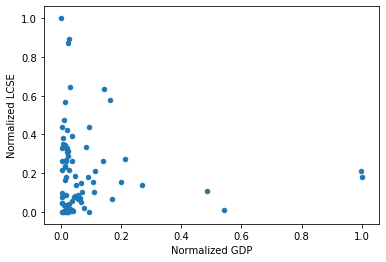

In [21]:
correlation_hypothesis_df.plot.scatter(y = 'Normalized LCSE', x = 'Normalized GDP')

Well... **not really**. 

Actually, to say there's no correlation would defy logic. Overall, **richer countries will have more access to new technology**: it's always important to remember that renewables are expensive and require internal industry or exportation, while most countries can extract or export coal and oil for cheap - *or at least cheaper*. **But a country having a high gdp doesn't mean that it will have a high share of primary consumption energy produced with low carbon, nor a country using mostly fossil fuel mean that it has a low GDP!**

Maybe a better analysis would be **the correlation between LCSE and the Human Development Index** (DHI). This index compreends more than just the economic dimension [7], it also looks for, as the name implies, quality of life dimensions, so it would make sense that a country more worried about living well, to also be worried with the enviroment - It would, in fact, make more sense than just looking at GDP alone, since a country trying to maximize economical gains at any cost, will use cheaper energy sources, like coal.

But this data is not available in our current dataset. I'll import a table that's a subset from [UN's more complete table](https://hdr.undp.org/sites/default/files/2020_statistical_annex_all.xlsx), with just data from 2018 (the same year of our analysis).

**Notes:**
- [7] [Definition and Data for DHI from the United Nation](https://hdr.undp.org/en/content/human-development-index-hdi)

In [22]:
dhi_2018 = pd.read_csv('DHI_2018.csv', header = None, names = ['country', 'DHI']).set_index('country')

In [23]:
dhi_2018.head()

,DHI
country,
Norway,"0,956"
Ireland,"0,951"
Switzerland,"0,955"
"Hong Kong, China (SAR)","0,946"
Iceland,"0,946"


Now we must **join** these two tables.

In [24]:
dhi_lcse_hip_df = correlation_hypothesis_df.join(dhi_2018, on = 'country', how = 'left' ).dropna()

Just as before, we'll choose only the data that's relevant for the analysis and we'll only work with countries that have both the data for the LCSE and the DHI.

In [25]:
dhi_lcse_hip_df = dhi_lcse_hip_df[['country', 'low_carbon_share_energy', 'DHI']].dropna().set_index('country')

Another problem is that this new data frame has floats indicated by a comma (Norway's DHI is 0,956), and Pandas is not able to recognize this as a float, so we must use a string method to replace the comma with a point, and then cast them as a float, so that we can finally work with the data!

In [26]:
dhi_lcse_hip_df['DHI'] = dhi_lcse_hip_df['DHI'].str.replace(',','.').astype('float')

In [27]:
dhi_lcse_hip_df.corr(method='spearman')

,low_carbon_share_energy,DHI
low_carbon_share_energy,1.000000,0.412523
DHI,0.412523,1.000000


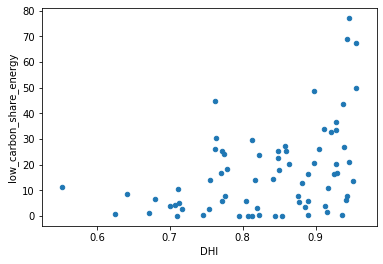

In [28]:
dhi_lcse_hip_df.plot.scatter(y = 'low_carbon_share_energy', x = 'DHI')

There's clearly a stronger correlation between DHI and LCSE, but, as the r-value of 0.413 indicates, **this doesn't tell us the whole story**. I would imagine that the disponibility of natural resources is also a big part of how energy is produced (and therefore consumed)

But there's a intersting trend that our plot shows us, **there are three different clusters**! Maybe it's hard to see it like this, so let's make them more visible:

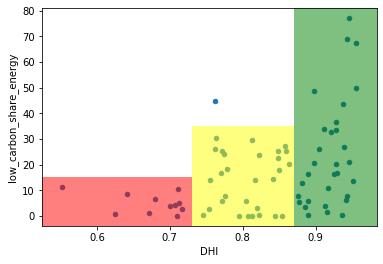

In [29]:
import numpy as np

ax = dhi_lcse_hip_df.plot.scatter(y = 'low_carbon_share_energy', x = 'DHI')


# First cluster, low dhi
t_red = np.arange(0,0.74, 0.01)
x_red = t_red
collection = collections.BrokenBarHCollection.span_where( x =
    t_red, ymin=-10, ymax=15, where = x_red, facecolor='red', alpha=0.5)

ax.add_collection(collection)

# second one, medium dhi
t_yellow = np.arange(0.73,0.875, 0.01)
x_yellow = t_yellow
collection = collections.BrokenBarHCollection.span_where( x =
    t_yellow, ymin=-10, ymax=35, where = x_yellow, facecolor='yellow', alpha=0.5)

ax.add_collection(collection)

# lastly, the higher dhi
t_green = np.arange(0.87,1, 0.01)
x_green = t_green
collection = collections.BrokenBarHCollection.span_where( x =
    t_green, ymin=-10, ymax=100, where = x_green, facecolor='green', alpha=0.5)

ax.add_collection(collection)

Now it's easier to see! 

While the value of only 0.413 tells these two dimensions have only a moderate correlation, it's quite striking how the ceileng is well determined by the  country's DHI. Grouping these clusters might give us a better ideia wether the mean behavior also changes.

Let's use vectorization with numpy to make these operations a bit faster!

In [30]:
Conditions = [
    dhi_lcse_hip_df['DHI'] <= 0.74,
    dhi_lcse_hip_df['DHI'] < 0.875,
    dhi_lcse_hip_df['DHI'] >= 0.875
]

Results = [
    'Low',
    'Medium',
    'High'
]

dhi_lcse_hip_df['Status'] = np.select(Conditions, Results, default = None)

So the mean values, for each group, would be:

In [31]:
dhi_lcse_hip_df.groupby('Status').mean()['low_carbon_share_energy']

Status
High      23.751613
Low        4.969182
Medium    14.873933
Name: low_carbon_share_energy, dtype: float64

And we can also plot them, as a box plot, so that we can see outliers and standard deviation.

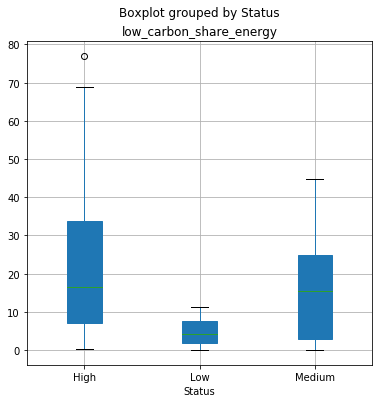

In [32]:
bplot = dhi_lcse_hip_df.boxplot(by = 'Status', column = 'low_carbon_share_energy', figsize = (6,6), patch_artist=True)

This makes it very clear that, on average, countries with a higher DHI also use less carbon intensive energy sources. But the spread also increases with DHI, this would indicate that, as said before, having a higher DHI only increases your options.

### Now, let's talk about Brazil!

In our scatter plot, you may have noticed that there's a outlier in the medium DHI. I didn't forget about him, quite the contrary, actually: I wanted to talk about him with more detail, since it is, in fact, **Brazil**.

In [33]:
dhi_lcse_hip_df.loc['Brazil']

low_carbon_share_energy    44.701
DHI                         0.762
Status                     Medium
Name: Brazil, dtype: object

Looking at our ranking, we see that Brazil is the 7th best in terms of consuming clean energy, making it quite a striking outlier, since it has a medium DHI, so it make's us wonder: **What is it that makes my country such a positive example, in this regard?**

Let's create a new dataframe, with all the data we have on Brazil!

In [38]:
brazil_df = energy_df[energy_df['country'] == 'Brazil'][['year','biofuel_share_energy','coal_share_energy',
                                          'gas_share_energy','hydro_share_energy', 'nuclear_share_energy',
                                           'oil_share_energy', 'other_renewables_share_energy', 'solar_share_energy',
                                           'wind_share_energy']]

In [42]:
brazil_df.tail()

,year,biofuel_share_energy,coal_share_energy,gas_share_energy,hydro_share_energy,nuclear_share_energy,oil_share_energy,other_renewables_share_energy,solar_share_energy,wind_share_energy
2288,2017,6.050,5.841,11.256,27.735,1.177,40.754,3.957,0.062,3.169
2289,2018,6.971,5.673,10.663,28.722,1.157,38.963,4.016,0.256,3.579
2290,2019,7.552,5.218,10.356,28.554,1.158,38.725,3.941,0.478,4.018
2291,2020,7.804,4.822,9.629,29.349,1.131,38.364,4.095,0.589,4.217
2292,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


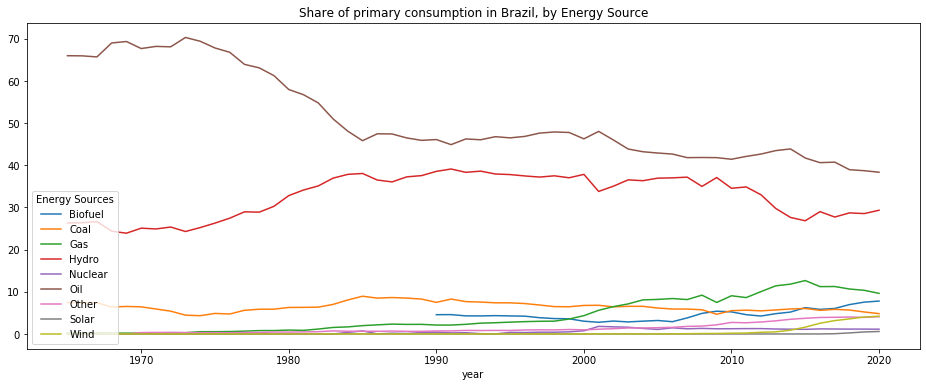

In [40]:
y = brazil_df.keys()[1:]
brazil_df.plot(x = 'year', y = y, title = 'Share of primary consumption in Brazil, by Energy Source', 
              figsize = (16,6))

plt.legend(['Biofuel', 'Coal', 'Gas', 'Hydro', 'Nuclear', 'Oil', 'Other', 'Solar', 'Wind'],
           loc='lower left', title='Energy Sources')

Any brazilian would be quick to tell you the reason for Brazil's success in sustainable energy consumption is Itaipu - the world's second largest dam. It began construction in the 70s and started producing energy in the 80's. 

This is very clear in our graph: between that time **Hydro took a large portion of Oil's share**. Since then, Hydro has been largely the main energy source for electricity - That's also a very present in every brazilian's life, because in our electricity bill there's always a flag, telling us how that electricity was produced: when the flag is red, the dam was dry and didn't produce enough energy, making the bill more expensive, since the energy agency had to burn coal in thermoelectric industries. (*And, yes, as the graph shows, the electricty bill has been getting more expensive since 2010*)

There's a interesting growth in gas usage, as well, probably much of that is because of the **Bolivian Gas**. Bolivia and Brazil have made many deals in the hydrocarbon market, especially those made in the 90s, made stronger in the earlier 2000s, by former president Lula and then, because of economical crysis in 2014, made weaker. All these historical trends [8] can be clearly seen in the graphs.

We can also see a growth in the demand for biofuel, which is a energy source that's quite popular in the country: Since the beging of the last century, Brazil has taken measures to increase the market of sugarcane ethanol, thus protecting the internal market from petroil's variation - Most notabilly, we can mention PROÁLCOOL, which was a policy, created in the mid 70s, for increasing the usage of biofuel in cars. Most cars being sold in Brazil today are *flex-fuel* (may use gasoline, ethanol or a mix between both), thus, with higher oil prices (like the ones we have been seeing since the 2000s) the usage of biofuel tends to increase. [9]

Also, we can note how wind has been really taking off after the mid 2010s, likely as a result of PROINFA, a public program for incentivising alternative energy sources. Brazil has a great potential for wind energy, and it's share is likely to increase in future years. A conservative estimate indicates that Brazil has 143 GW of power. [10]

**Notes:**
- [8] Wikipedia, [Gasoduto Bolivia-Brasil](https://pt.wikipedia.org/wiki/Gasoduto_Bol%C3%ADvia-Brasil) (Access in 16/05/2022)
- [9] Nogueira, L. A. H., & Capaz, R. S. (2013). [Biofuels in Brazil: Evolution, achievements and perspectives on food security](https://www.sciencedirect.com/science/article/abs/pii/S2211912413000151). Global Food Security, 2(2), 117-125.
- [10] Lucena, J. D. A. Y., & Lucena, K. Â. A. (2019). [Wind energy in Brazil: an overview and perspectives under the triple bottom line](https://academic.oup.com/ce/article/3/2/69/5368440). Clean Energy, 3(2), 69-84.


## Final thoughts...

So, we've learned a lot!

It seems that the world is in an upwards trend, working towards a greener future. This greener future should also come with a better future, as the world's human living conditions get better. But this doesn't come naturally: one of the most important outliers in this regard, my home country, Brazil, is proof that through economical incentives the goal for diversifying the energy matrix may comer quicker than is hoper for.

So, through this analysis, the biggest take away it that: **Energy, quality of living and solid planning** are all dependant on each other, so for governaments and institutions that want to help in this transition, things to keep in mind:

- A happy population, that has all of it's basic needs met is **more likely** to advocate for clean energy. So keep people happy, engaged and well tended.
- The energy market is not the stock market: Changes are slow - but **slow and steady wins the race**. Plan for long term projects, and create incentives for those to take place, this is the strategy that made Brazil one of the few exceptions: being a developing country with a clean and diverse energy matrix.

